# Part 1: Simple aperiodic and recurrent markov chain

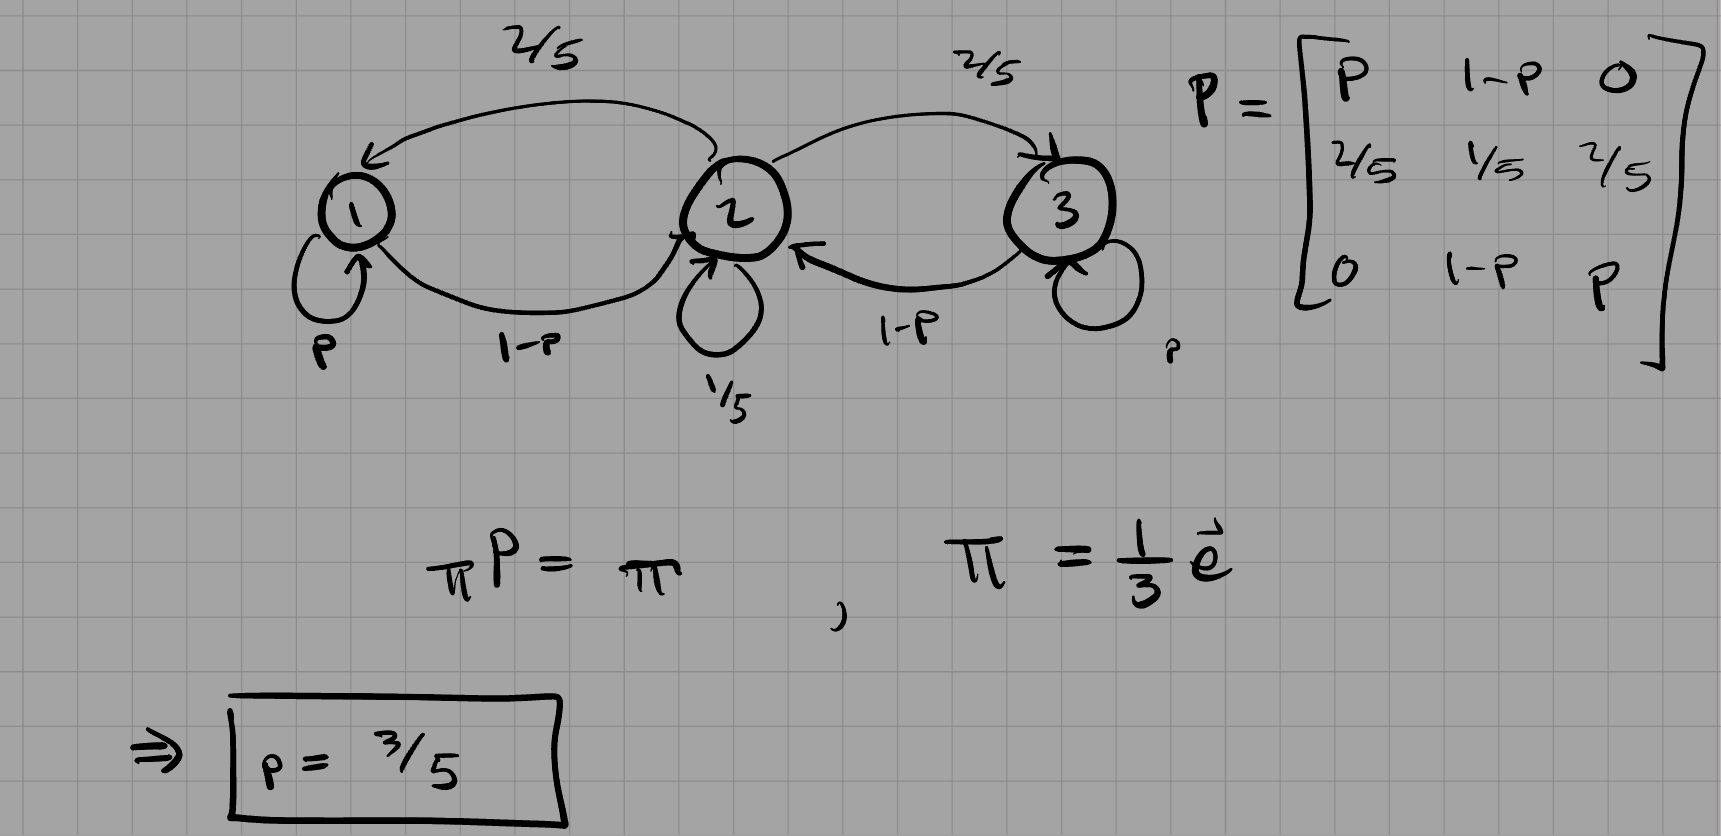

In [37]:
# Simulate our answer to check.
from random import random
import numpy as np


def P_matrix(p):
    return np.array([[p, 1 - p, 0], [2 / 5, 1 / 5, 2 / 5], [0, 1 - p, p]])


def sim1(p, num_trials=10**7):
    state_counts = np.zeros(3)
    cur_state = 0
    state_counts[cur_state] += 1
    P = P_matrix(p)
    for _ in range(num_trials):
        probs = P[cur_state]
        x = random()
        cum_prob = 0
        for s in range(3):
            cum_prob += probs[s]
            if x < cum_prob:
                cur_state = s
                state_counts[cur_state] += 1
                break
    print(f"The approximate stead state dist for {p = } is {state_counts / num_trials}")

In [28]:
sim1(3 / 5)

The approximate stead state dist for p = 0.6 is [0.3334332 0.3332685 0.3332984]


# Part 2: Set up 6 state periodic markov chain. 
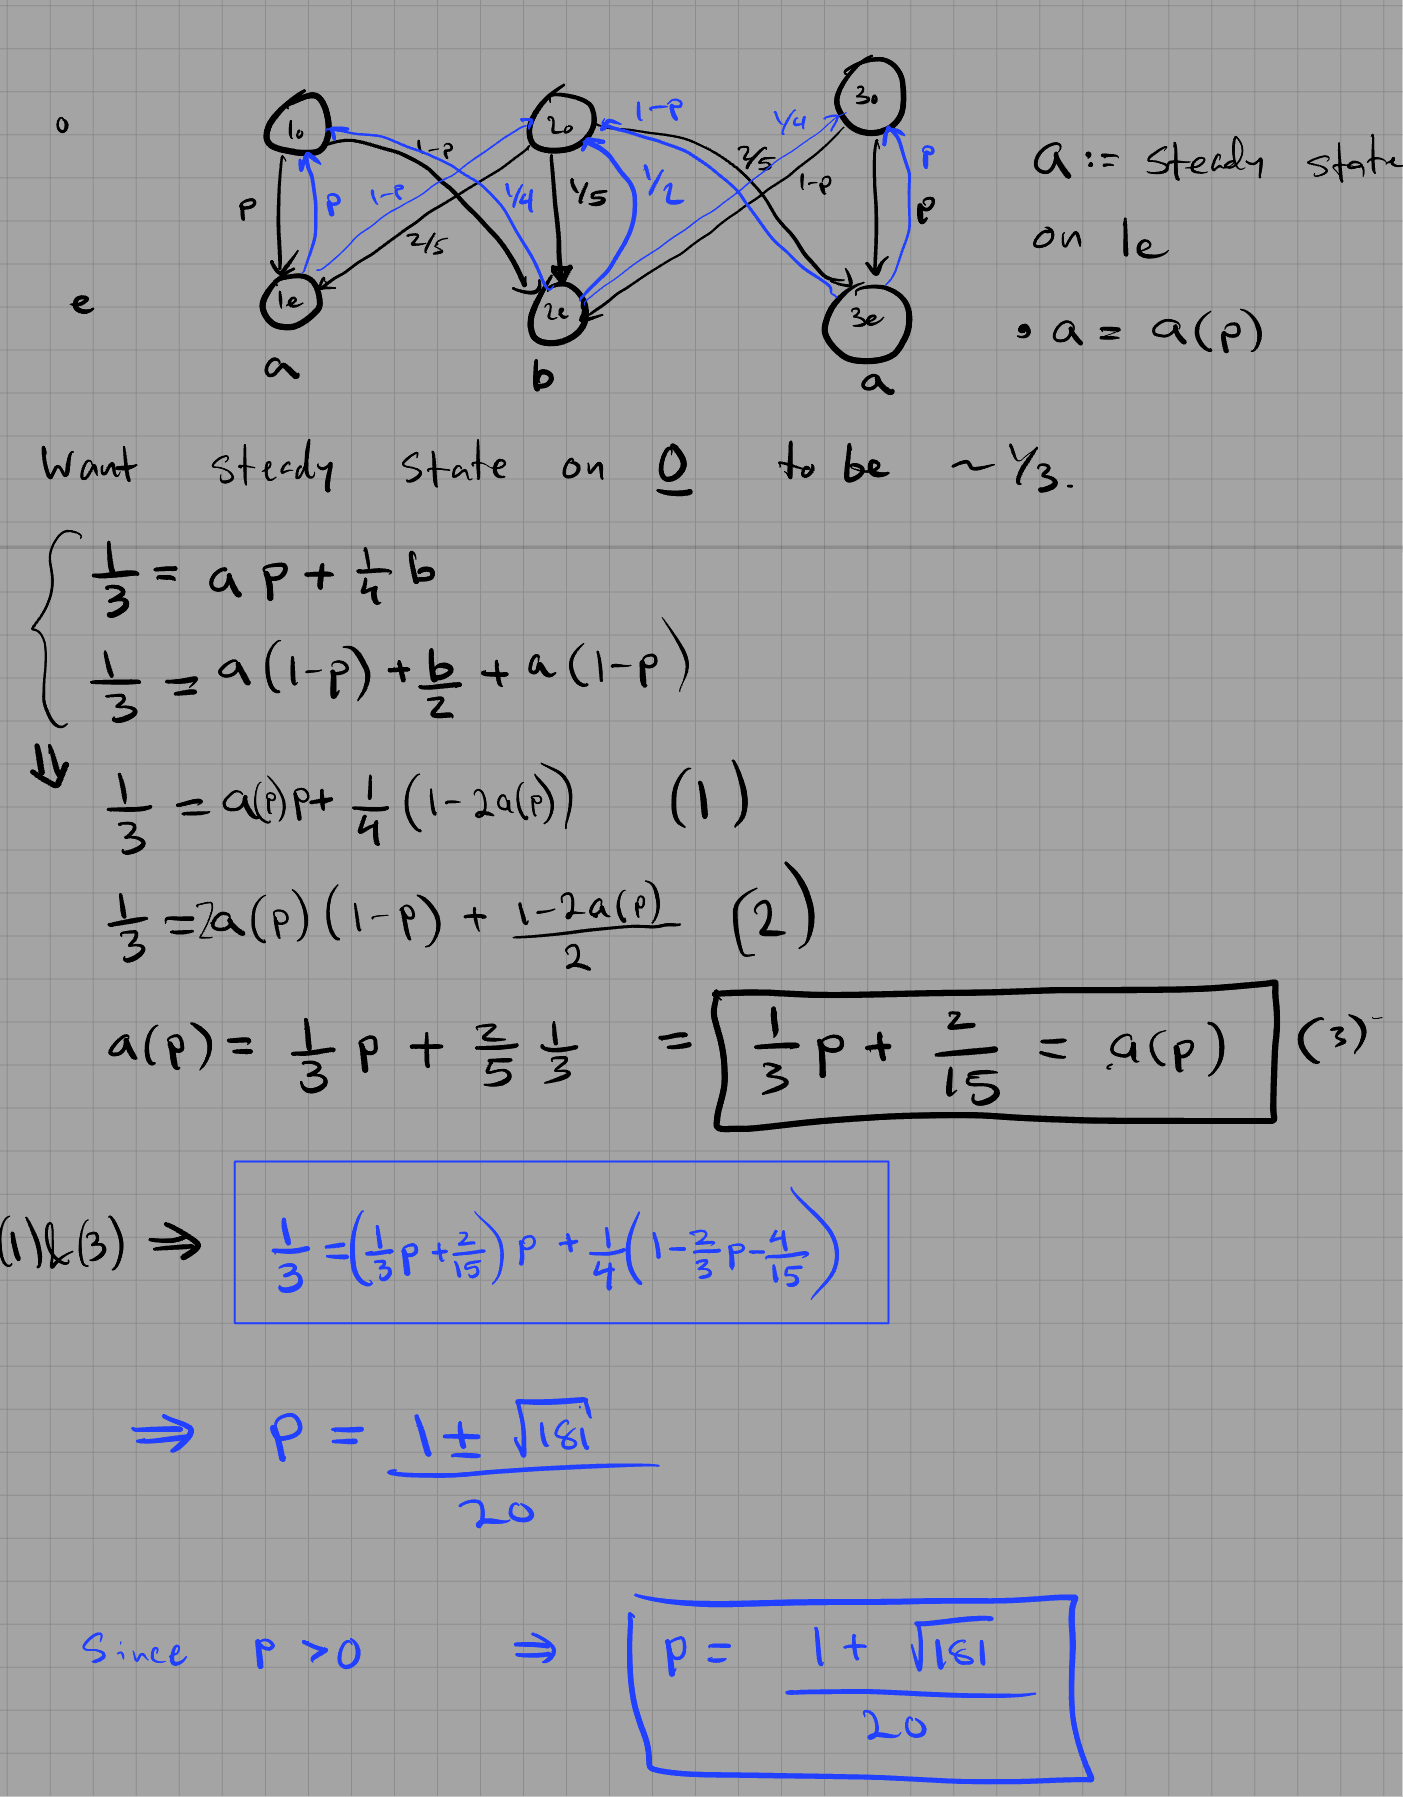

In [35]:
def sim2(p, num_trials=10**7):
    even_state_counts = np.zeros(3)
    odd_state_counts = np.zeros(3)
    pairity = 0
    cur_state = 0
    even_state_counts[cur_state] += 1
    for _ in range(num_trials):
        if pairity == 0:  # after even # moves
            P = np.array([[p, 1 - p, 0], [2 / 5, 1 / 5, 2 / 5], [0, 1 - p, p]])
        else:
            P = np.array([[p, 1 - p, 0], [1 / 4, 1 / 2, 1 / 4], [0, 1 - p, p]])
        probs = P[cur_state]
        x = random()
        cum_prob = 0
        for s in range(3):
            cum_prob += probs[s]
            if x < cum_prob:
                cur_state = s
                if pairity == 0:
                    odd_state_counts[cur_state] += 1
                else:
                    even_state_counts[cur_state] += 1
                break
        pairity ^= 1
    # print(f"The approximate stead state dist for {p = } is {state_counts / num_trials}")
    return 2 * odd_state_counts / num_trials, 2 * even_state_counts / num_trials

In [ ]:
p = (1 + np.sqrt(181)) / 20
sim2(p)

(array([0.374546 , 0.2509456, 0.3745084]),
 array([0.33336  , 0.3332192, 0.333421 ]))